
    
# Data Vizualization CA1 2023 
## CCT college
    
### Higher Diploma in Science in Data Analytics for Business
### Lecture : David McQuaid 

#### By Giovanna Amorim
###### Student Number : 2022502


# Introduction <a name="introduction"></a>

This project aims to conduct visualization and analysis based on the dataset “board_games.csv” which will illustrate requirements of the company CTO. Thoughtout the project, visualization will be created so can be easily understood and all data wrangling, analysis, and visualizations will be generated using Python.

# Table of contents
1. Introduction
2. EDA
3. Part 1

 Top 5 Best Average-Rated games
 
 Correlation among the features
 
 Distribution of the features
 
 Older games Analysis
 
 3 most common “mechanics” in the dataset
 
 
4. Part 2

 Statistically Relevant question
 
 
5. Part 3

 Method applied for visualization purposes
 
 
6. Sources

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

*Above the main libraries imported that will be used to conduct the analysis.*

# EDA <a name="EDA"></a>

In [3]:
data = pd.read_csv('board_games.csv')
data

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,214996,Description from the publisher:&#10;&#10;Silve...,//cf.geekdo-images.com/images/pic3093082.png,2,480,12,1,30,"Silver Bayonet: The First Team in Vietnam, 196...",480,...,Charles Kibler,"Vietnam War,Wargame",NaN,"Gene Billingsley,Mitchell Land",NaN,GMT Operational System,Hex-and-Counter,GMT Games,8.35333,75
10528,215437,"Codex: Card-Time Strategy is a customizable, n...",//cf.geekdo-images.com/images/pic3290122.jpg,5,45,13,2,45,Codex: Card-Time Strategy – Core Set,45,...,NaN,"Card Game,Fantasy,Fighting,Video Game Theme",NaN,David Sirlin,Codex: Card-Time Strategy – Flagstone Dominion...,Fantasy Strike,"Deck / Pool Building,Hand Management,Variable ...",Sirlin Games,8.08780,82
10529,215471,Time to walk about town and take some pictures...,//cf.geekdo-images.com/images/pic3290975.png,4,20,12,2,20,Wind the Film!,20,...,宝井 貴子 (Takako Takarai),Card Game,NaN,Saashi,NaN,NaN,"Hand Management,Set Collection",Saashi & Saashi,7.28016,63
10530,216201,The race is on for the robots of the Robo Rall...,//cf.geekdo-images.com/images/pic3374227.jpg,6,120,12,2,20,Robo Rally (2016),120,...,NaN,"Miniatures,Racing,Science Fiction",NaN,Richard Garfield,NaN,Robots,"Action / Movement Programming,Grid Movement,Mo...","Avalon Hill (Hasbro),Hasbro",7.45871,341


In [4]:
data.shape

(10532, 22)

*The dataset has 22 columns and 10532 rows. It is a good dataset lengthwise whether necessary to run any Machine Learning models.*

*Bellow, we will find out more about the dataset structure.*

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

*As we can tell by the outcome, the dataset is versatile with a range of types from categorical to numerical columns.*

In [6]:
# Display the name of the columns for better visualization alogside the project development
data.iloc[0]

game_id                                                           1
description       Die Macher is a game about seven sequential po...
image                   //cf.geekdo-images.com/images/pic159509.jpg
max_players                                                       5
max_playtime                                                    240
min_age                                                          14
min_players                                                       3
min_playtime                                                    240
name                                                     Die Macher
playing_time                                                    240
thumbnail             //cf.geekdo-images.com/images/pic159509_t.jpg
year_published                                                 1986
artist                                          Marcus Gschwendtner
category                             Economic,Negotiation,Political
compilation                                     

*On the following code, funtions will be ran to figure out wheter any Null values or NA values treatment will be needed.* 

In [7]:
data.isnull().sum()

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64

In [8]:
data.isnull().sum().sum()

24658

*Alright, as we can tell there are 24658 row with NA/ values and most of them comes from the columns "compilation" and "expansion". It is pretty clear it belongs to columns where we might have missrecords so I will drop those columns and afterwards consider the other NAs to drop regardless the columns "compilation" and "expansion".*

In [9]:
data.drop(["compilation","expansion"],axis=1, inplace=True)

In [10]:
data.isnull().sum()

game_id              0
description          0
image                1
max_players          0
max_playtime         0
min_age              0
min_players          0
min_playtime         0
name                 0
playing_time         0
thumbnail            1
year_published       0
artist            2773
category            94
designer           126
family            2808
mechanic           950
publisher            3
average_rating       0
users_rated          0
dtype: int64

In [11]:
data.isnull().sum().sum()

6756

*Once figured out the missing values on the dataset I will use the missing matrix method to visualize those gaps in the sampling collected. "Missingno" is an excellent and simple-to-use Python library that provides a series of visualisations to understand the presence and distribution of missing data within pandas data frame. This can be in the form of either a barplot, matrix plot, heatmap, or a dendrogram."(McDonald, 2021)*

*Next, th Missingno library will be downloaded and the plot in matrix and bars will be displayed for better vizualization.*

In [12]:
pip install missingno


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Figure size 800x500 with 0 Axes>

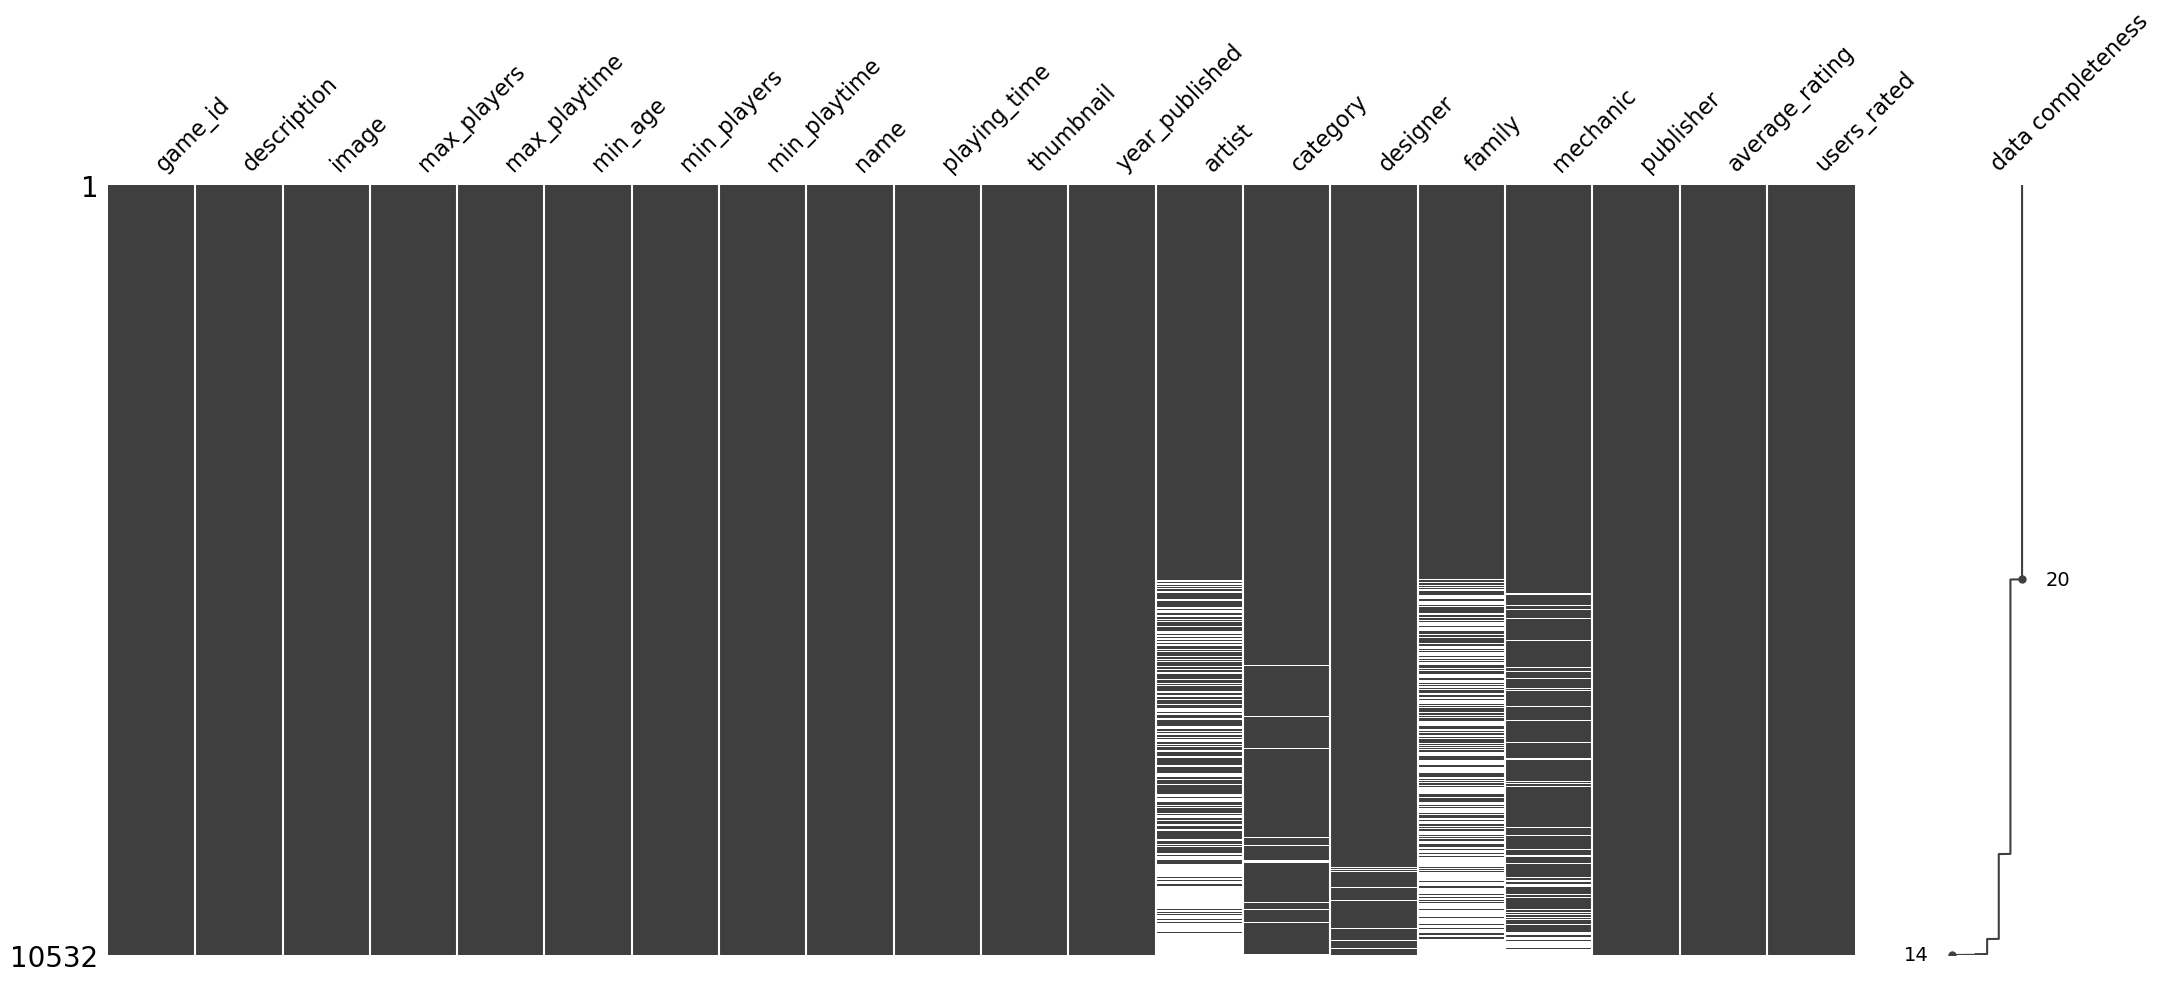

In [13]:
import missingno as msno
plt.figure(figsize=(8, 5))
msno.matrix(data, labels=True, sort="descending");

<Figure size 800x500 with 0 Axes>

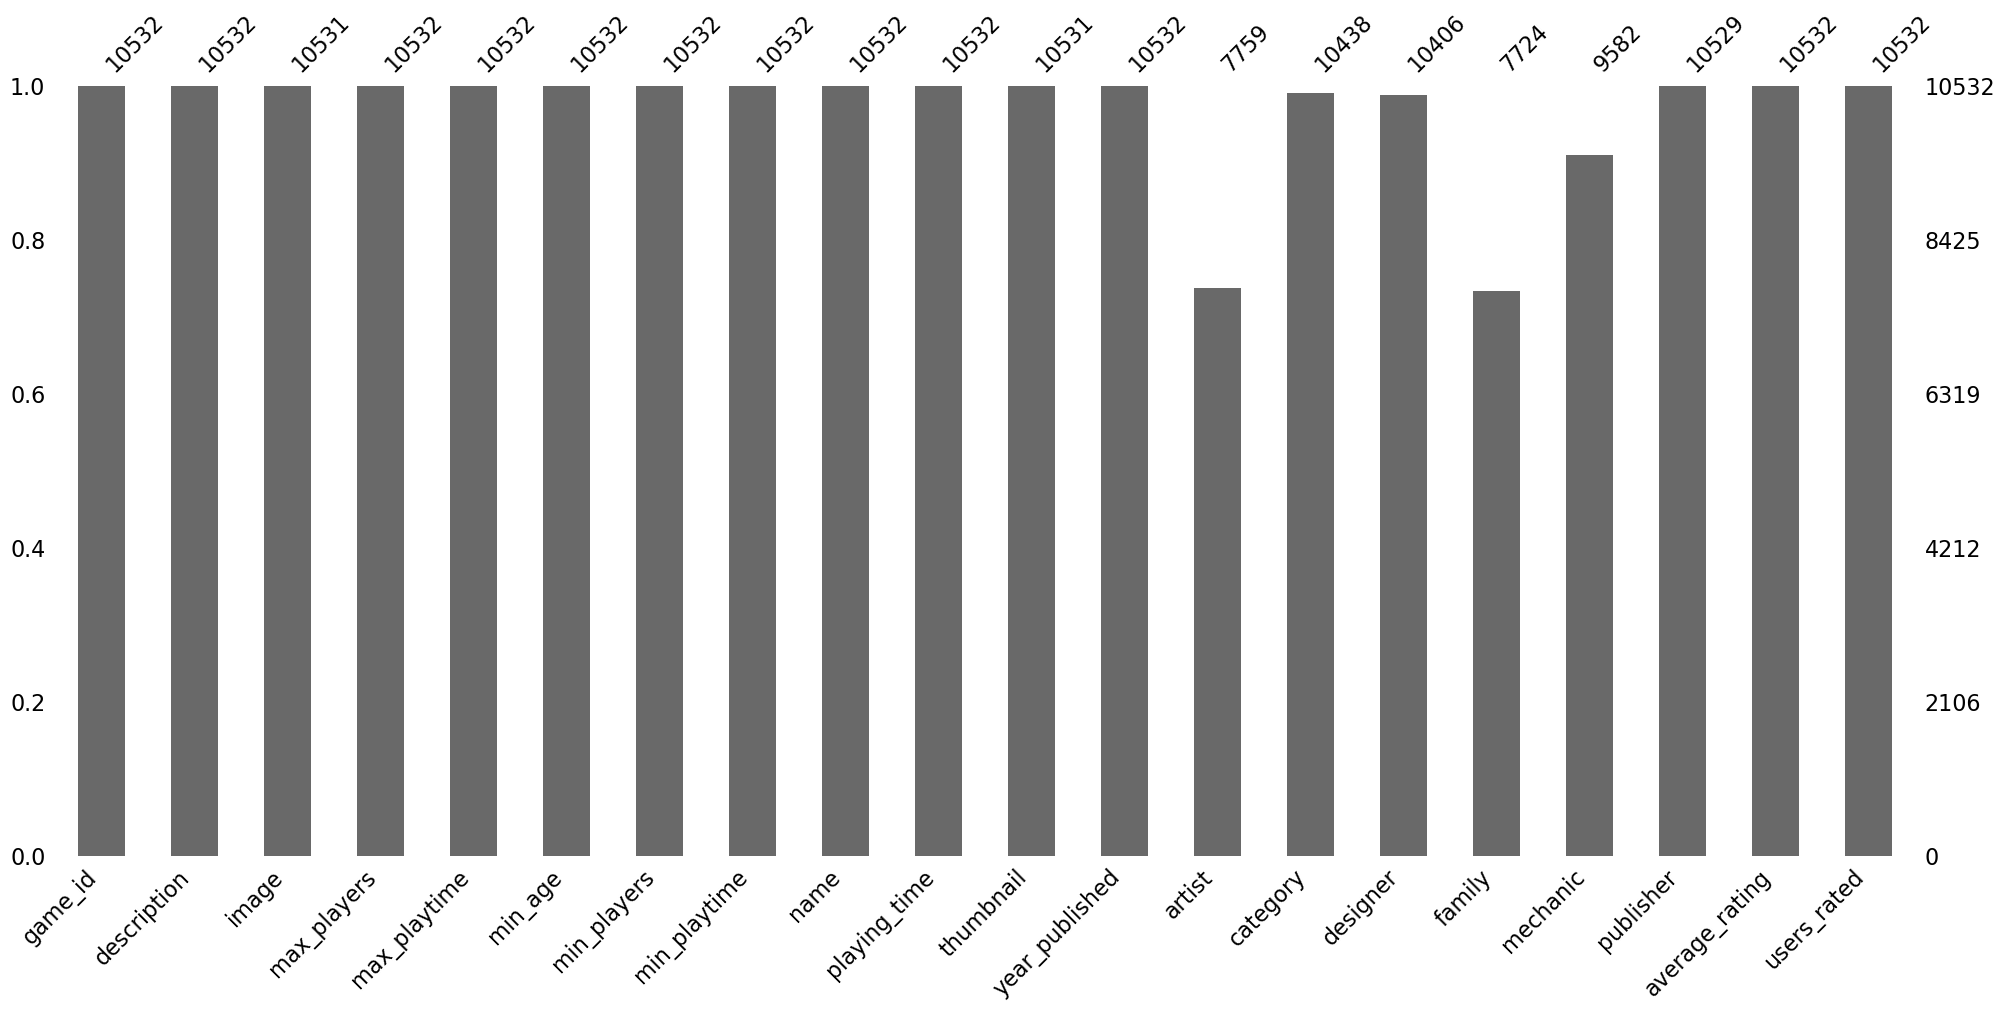

In [14]:
plt.figure(figsize=(8, 5))
msno.bar(data);

*It is pretty clear now that "artist" and "family" are the columns with the biggest number of missing values.*

*Considering we still ended up with 64,14% of the observations with missing values and all of them belong to categorical types, I will not drop those rows since that amount of data will be valuable for further analysis even though the data records are incomplete. In other words, the missing values we can find on the categorical columns cannot impact the other numerical observations we have on the dataset, so dropping the whole sampling of observations will prevent us to go through depth analysis throughout the project.*

*Based on that, I will fill the missing values with "Non identified" classification.*

In [15]:
data.fillna("Non Identified", inplace=True)
data.isnull().sum().sum()

0

*Once again, to make sure we have treated the missing values perfectly, the matrix will be plotted for better visualisation.* 

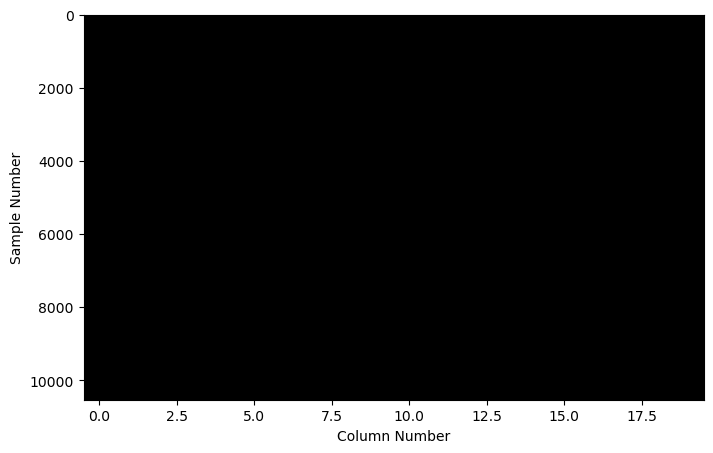

In [16]:
plt.figure(figsize=(8, 5))
plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

*End of the missing values treatment once we have managed to repair all of them.*

*******************

*On the next step, I will check out duplicated observations on the dataset.*

In [17]:
data["game_id"].duplicated().any()

False

*I am still not completely confident there isn't duplicates, so I will perform the validation on the column "name"*

In [18]:
data["name"].duplicated().sum()

175

*Considering the owners might have had published the game wrongly (hence we have 175 duplicates name based) I will drop duplicates observations based on the column "name"*

In [19]:
data.drop_duplicates(subset=['name'])
data.shape

(10532, 20)


*To finish up the EAD part, I still want to have a look at how the numerical columns perform on this dataset and for that I will display Histograms to look at their distribution.*

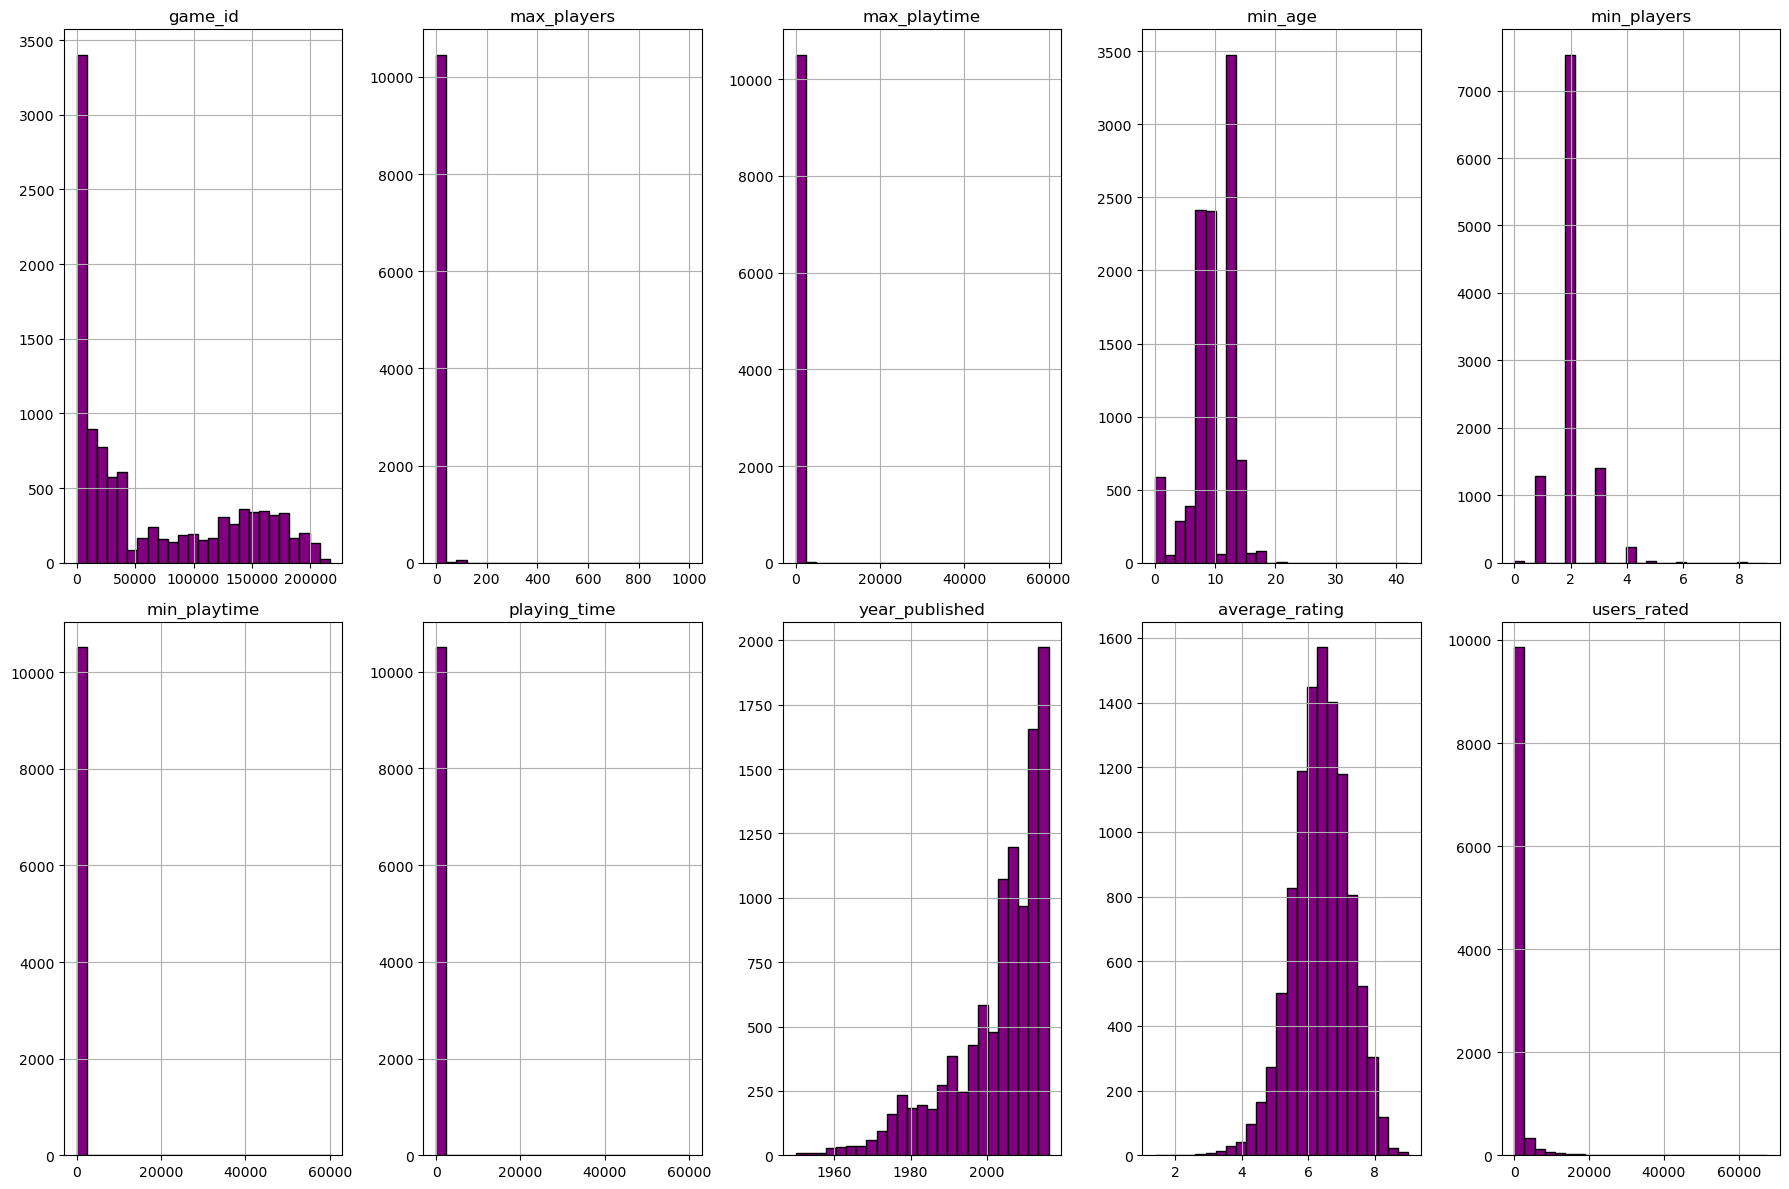

In [20]:
#Plots the histogram for each numerical feature in a separate subplot
data.hist(bins=25, figsize=(18, 12), layout=(-1, 5), edgecolor="black", color="purple")
plt.tight_layout();

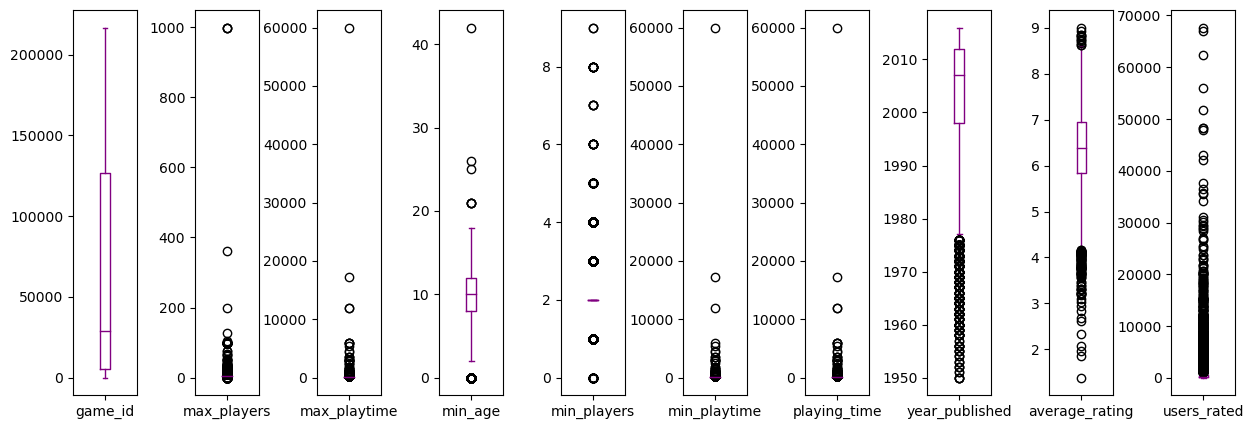

In [21]:
data.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 5),
    color="purple")

# increase spacing between subplots
plt.subplots_adjust(wspace=0.90) 
plt.show()

*Breaking down the columns aspects :* 
- **"game_id":** *unnecessary to go into a depth analysis for now once is just a matter of Id from the games. Although, it's important to point we have outliers when it comes to their IDs.*
- **"max_players":** *In this column, we can tell that most of the games published have 0 players.* 
- **"max_playtime":** *This column has pretty much the same characteristics as the column "max_players".*
- **"min_age":** *Follows a skewed distribution and we can tell the curve of the player's age.*
- **"min_players":** *Most of the games has only 2 players.* 
- **"min_playtime":** *Most of the games have non-playtime recorded.*
- **"playing_time":**  *The same goes for the "playing_time" column.*
- **"year_published":** *In this column we can check out the ascending movement of games being published throughout the years.* 
- **"average_rating":** *Follows a positive skewed distribution. Mod between 6 and 8.*
- **"users_rated":**  *Most of the records fall at 0.*


************

# Part 1

- What are the top 5 “average-rated” games?
- Is there a correlation between the “users_rated” and the “max_playtime”?
- What is the distribution of game categories?
- Do older games (1992 and earlier) have a higher MEAN “average rating” than newer games (after 1992)?
- What are the 3 most common “mechanics” in the dataset?

## Top 5 Best Average-Rated games 
*In the following steps, procedures will be taken to get the best average-rated games we got on the sampling from the data set.*

In [22]:
data = data.sort_values(by='average_rating', ascending=False)

In [23]:
Ratings5 = data.iloc[0:5,:]
Ratings5

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,thumbnail,year_published,artist,category,designer,family,mechanic,publisher,average_rating,users_rated
8348,140135,Small World's Designer Edition is a spare-no-e...,//cf.geekdo-images.com/images/pic2270432.jpg,6,80,8,2,40,Small World Designer Edition,80,//cf.geekdo-images.com/images/pic2270432_t.jpg,2015,"Miguel Coimbra,Cyrille Daujean","Civilization,Fantasy,Territory Building",Philippe Keyaerts,"Crowdfunding: Kickstarter,Small World","Area Control / Area Influence,Area Movement,Di...",Days of Wonder,9.00392,180
6392,55690,Kingdom Death: Monster is a fully cooperative ...,//cf.geekdo-images.com/images/pic2931007.jpg,6,180,17,1,60,Kingdom Death: Monster,180,//cf.geekdo-images.com/images/pic2931007_t.jpg,2015,"Lokman Lam,Lorinda Tomko","Adventure,Fantasy,Horror,Mature / Adult,Miniat...",Adam Poots,"Campaign Games,Crowdfunding: Kickstarter,Kingd...","Co-operative Play,Dice Rolling,Grid Movement,R...",Kingdom Death,8.93184,1954
9964,181289,"Terra Mystica: Big Box, a Korean crowdfunding ...",//cf.geekdo-images.com/images/pic2602334.jpg,5,150,12,2,60,Terra Mystica: Big Box,150,//cf.geekdo-images.com/images/pic2602334_t.jpg,2015,Dennis Lohausen,"Civilization,Economic,Fantasy,Territory Building","Jens Drögemüller,Helge Ostertag",Terra Mystica,"Route/Network Building,Variable Player Powers","Feuerland Spiele,Korea Boardgames co., Ltd.",8.84862,109
8526,144574,(from MMP website:)&#10;&#10;Last Chance for V...,//cf.geekdo-images.com/images/pic1875530.jpg,2,60,15,2,60,Last Chance for Victory,60,//cf.geekdo-images.com/images/pic1875530_t.jpg,2014,"Dean Essig,Gettysburg Cyclorama","American Civil War,Civil War,Wargame",Dean Essig,Line of Battle Series,"Dice Rolling,Hex-and-Counter",Multi-Man Publishing,8.84603,88
9675,173504,"The Greatest Day: Sword, Juno, and Gold Beache...",//cf.geekdo-images.com/images/pic2422496.jpg,8,6000,12,2,60,"The Greatest Day: Sword, Juno, and Gold Beaches",6000,//cf.geekdo-images.com/images/pic2422496_t.jpg,2015,Nicolás Eskubi,"Wargame,World War II",Adam Starkweather,Grand Tactical Series,Chit-Pull System,Multi-Man Publishing,8.83081,86


*Above, I have declared the variable where we can find the top 5 better-rated games. That variable was defined once on the following code I will plot a graph to better visualise the raking by "average_rating"*

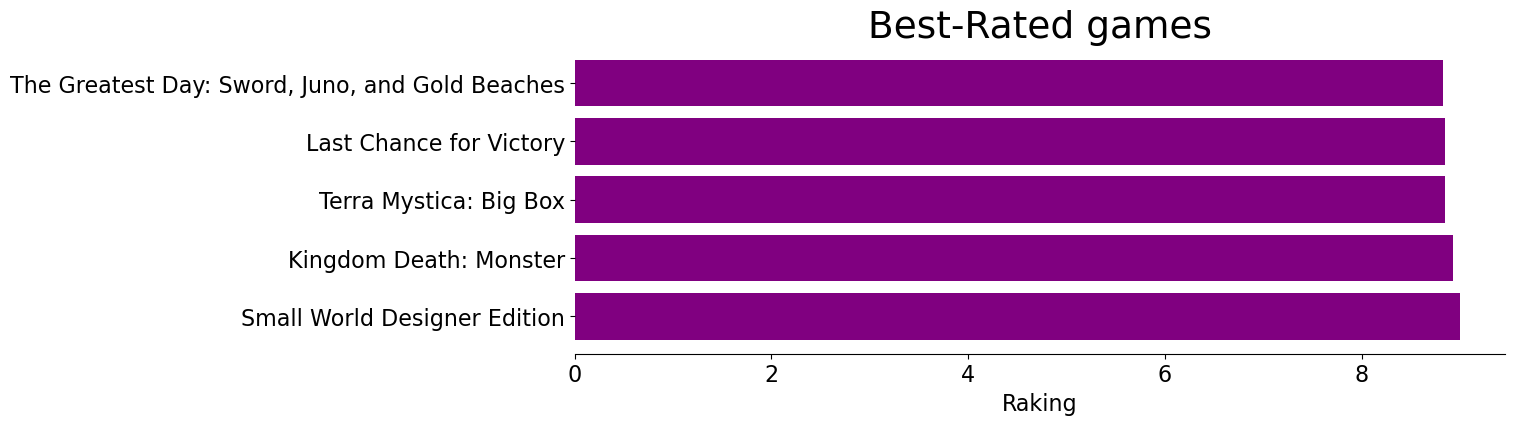

In [24]:
plt.figure(figsize=(12,4))
splot = plt.barh(Ratings5["name"], Ratings5["average_rating"], color='purple')
plt.title('Best-Rated games', fontsize=27)
plt.xlabel('Raking',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(left=True)
sns.despine(left=True)
plt.show()

*All right, by the plot and the code above, I managed to get the best-rated games by ascending order. The difference between them doesn't have a large length since we are working with a small range of ratings by being 0 out of 10.*

****************

## Correlation among the features

*Correlation is a method that measures, as the name suggests, the correlation between variables. In other words, "It measures the extent to which two variables are linearly related".*(Simplilearn.com, n.d.)

*Next, I will plot a graph with the correlation between all the variables and afterwards as requested, the analysis breakdown between the features “users_rated” and the “max_playtime” will be developed.*

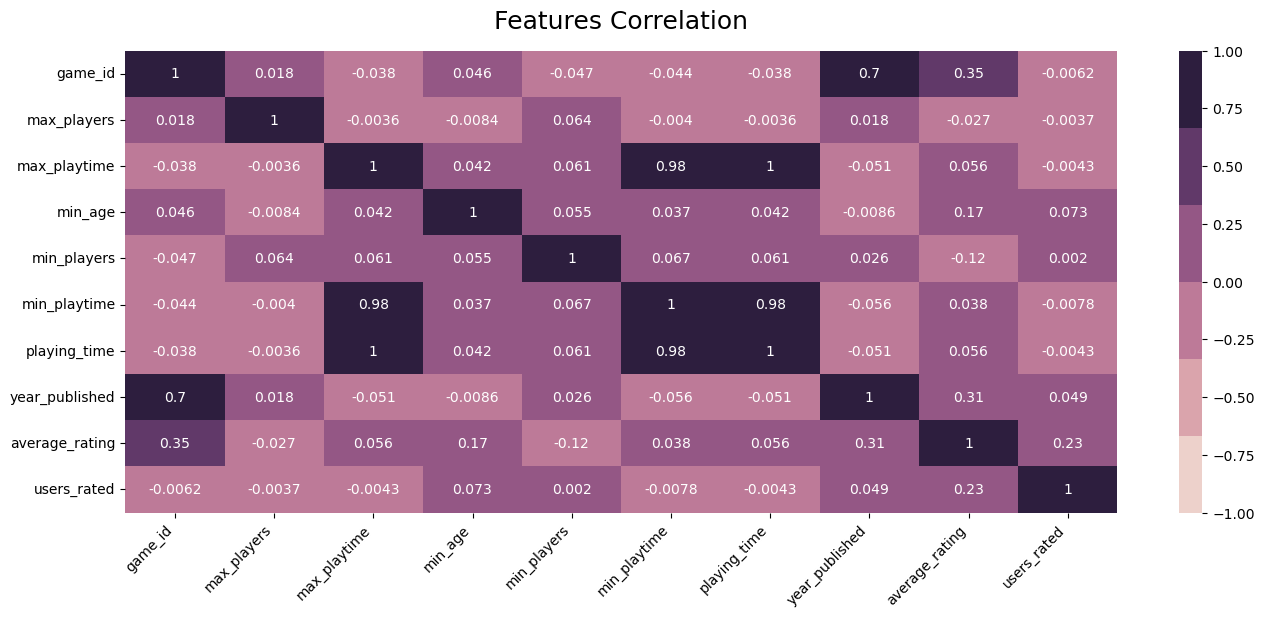

In [25]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,cmap=sns.cubehelix_palette())

## Title
heatmap.set_title('Features Correlation', fontdict={'fontsize':18}, pad=16);

## Lables features
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

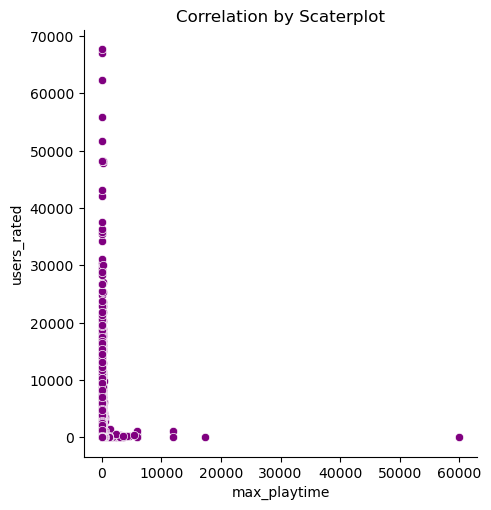

<Figure size 800x600 with 0 Axes>

In [48]:
#plot the graph
scatter = sns.relplot(data=data, x="max_playtime", y="users_rated", color='Purple');
#Adding title
scatter.set(title='Correlation by Scaterplot');
plt.figure(figsize=(8, 6));

*By considering the outcomes from the correlation method used on the heatmap and scatterplot visualization, we can tell both features, “users_rated” and the “max_playtime” do not correlated.* 

*In a depth way, according to the correlation statistics outcome we got, those features have -0.0043 which implies slight negative correlation.
On the Scatterplot visualization, we can check out that clearly the movement between those features and once again, there is no correlation between them since the Scatterplot does not follow the upwards neither the downward movement among the observations.*  

*************

## Distribution of the features

*How is the distribution of game categories?*


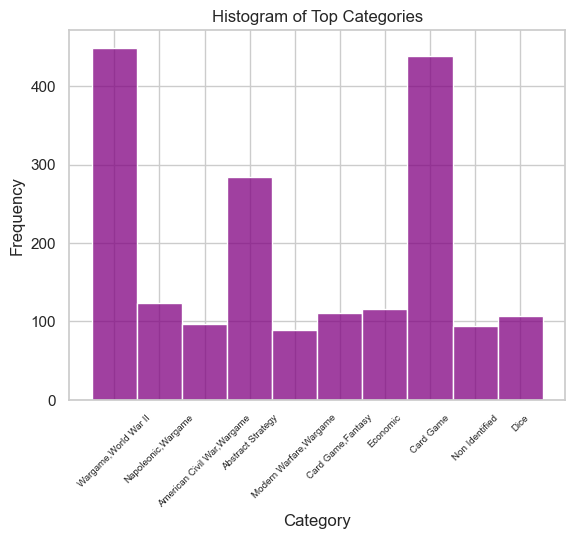

In [67]:
# Determine the most frequent categories
top_categories = data['category'].value_counts().index[:10]  

# Filter the data to include only the top categories
filtered_data = data[data['category'].isin(top_categories)]

sns.histplot(data=filtered_data, x="category", color="purple", discrete=True)

# Add labels and a title (customize as needed)
plt.xlabel("Category",fontsize=12)
plt.ylabel("Frequency")
plt.title("Histogram of Top Categories")
plt.xticks(fontsize=7,rotation=45)

# Show the plot
plt.show()

In [68]:
data["category"].nunique()

3861

In [69]:
data["category"].value_counts()

Wargame,World War II                                  449
Card Game                                             438
Abstract Strategy                                     284
Napoleonic,Wargame                                    124
Economic                                              116
                                                     ... 
Fighting,Humor                                          1
Animals,Nautical                                        1
American West,Mythology                                 1
Dice,Science Fiction,Video Game Theme,Wargame           1
Animals,Environmental,Prehistoric,Religious,Trivia      1
Name: category, Length: 3861, dtype: int64

*Trying to get the visualization from the column **"category"** was pretty hard once we have a wide variety of categories in the column. We have 3861 unique values categories for the entries and plotting a graph for that is not useful, as we could check out on the histogram displayed.*

*What I will do is narrow down the entries by collecting the 10 most recorded observations from the categories of the games and figure out its distribution.* 

*I had the same challenge while handling the previous task, trying to get the 5 best-rated games although I could not solve the issue as I should. I would like to highlight that thoughtout the project I have learned and improved the code on the since the last tasks.* 

In [70]:
Category = data['category'].value_counts().nlargest(10)
Category

Wargame,World War II          449
Card Game                     438
Abstract Strategy             284
Napoleonic,Wargame            124
Economic                      116
Card Game,Fantasy             110
Dice                          107
American Civil War,Wargame     97
Non Identified                 94
Modern Warfare,Wargame         89
Name: category, dtype: int64

In [74]:
top10 = data['category'].value_counts().index[:10]
categorytop10 = data[data['category'].isin(top10)]
categorytop10

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,thumbnail,year_published,artist,category,designer,family,mechanic,publisher,average_rating,users_rated
9675,173504,"The Greatest Day: Sword, Juno, and Gold Beache...",//cf.geekdo-images.com/images/pic2422496.jpg,8,6000,12,2,60,"The Greatest Day: Sword, Juno, and Gold Beaches",6000,//cf.geekdo-images.com/images/pic2422496_t.jpg,2015,Nicolás Eskubi,"Wargame,World War II",Adam Starkweather,Grand Tactical Series,Chit-Pull System,Multi-Man Publishing,8.83081,86
9867,178896,Last Blitzkrieg is the first entry in the new ...,//cf.geekdo-images.com/images/pic3387407.jpg,4,960,13,2,180,Last Blitzkrieg,960,//cf.geekdo-images.com/images/pic3387407_t.jpg,2016,"Nicolás Eskubi,Dean Essig","Wargame,World War II",Dean Essig,Battalion Combat Series (BCS),"Dice Rolling,Hex-and-Counter,Simulation",Multi-Man Publishing,8.80263,76
6724,68820,Enemy Action: Ardennes is the first in a serie...,//cf.geekdo-images.com/images/pic2727233.jpg,2,600,0,1,0,Enemy Action: Ardennes,600,//cf.geekdo-images.com/images/pic2727233_t.jpg,2015,"Knut Grünitz,Timothy Schleif","Wargame,World War II",John H. Butterfield,"Solitaire Wargames,World War 2: Battle of the ...","Campaign / Battle Card Driven,Chit-Pull System...",Compass Games,8.75802,187
7011,85424,"This is the new, 3rd edition of the venerable ...",//cf.geekdo-images.com/images/pic965093.jpg,8,1000,16,2,1000,La Bataille de la Moscowa (third edition),1000,//cf.geekdo-images.com/images/pic965093_t.jpg,2011,"Charles Kibler,Timothy Schleif,Robert Tunstall","Napoleonic,Wargame",Terry Doherty,"La Bataille series,Country: Russia",Hex-and-Counter,Clash of Arms Games,8.60210,111
9287,163097,Beyond the Rhine: The Campaign for Northwest E...,//cf.geekdo-images.com/images/pic3204038.jpg,0,3000,15,2,3000,Beyond the Rhine,3000,//cf.geekdo-images.com/images/pic3204038_t.jpg,2015,"Nicolás Eskubi,Dean Essig","Wargame,World War II","Dean Essig,Roland LeBlanc","Operational Combat Series,World War 2: Battle ...","Dice Rolling,Hex-and-Counter,Simulation",Multi-Man Publishing,8.59789,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,1931,The &quot;Bust~the~Trust!&quot; Game&#10;&#10;...,//cf.geekdo-images.com/images/pic889118.jpg,6,120,8,2,120,Anti-Monopoly,120,//cf.geekdo-images.com/images/pic889118_t.jpg,1973,Non Identified,Economic,Ralph Anspach,Non Identified,"Auction/Bidding,Roll / Spin and Move,Set Colle...","(Unknown),Alga,Anti-Monopoly, Inc.,ASS Altenbu...",3.65816,517
10452,204887,Potions Brew is a card game and the winner of ...,//cf.geekdo-images.com/images/pic3109891.jpg,5,30,8,3,30,Potions Brew,30,//cf.geekdo-images.com/images/pic3109891_t.jpg,2016,Klemens Franz,Card Game,Andreas Prior,Non Identified,Set Collection,Österreichisches Spiele Museum e.V.,3.63131,84
752,1094,"Players move around a map of Europe, scoring p...",//cf.geekdo-images.com/images/pic288381.jpg,6,90,10,3,90,Assassin,90,//cf.geekdo-images.com/images/pic288381_t.jpg,1993,"Charles S. Jarboe, Jr.,Charles Kibler,Stephen ...",Card Game,"Chris Bayliss,Rex A. Martin",Non Identified,Non Identified,Avalon Hill,3.46933,239
3806,11532,User Summary&#10;&#10;Sub-titled &quot;The War...,//cf.geekdo-images.com/images/pic61136.jpg,2,0,12,2,0,The Eagle and the Sun,0,//cf.geekdo-images.com/images/pic61136_t.jpg,1991,Non Identified,"Wargame,World War II","Mike Crane,Terry R. Shrum",Non Identified,"Chit-Pull System,Dice Rolling,Hex-and-Counter,...",Fresno Gaming Association,3.37241,58


*In the code above, I have collected the 10 most occurrences from the column "category", so that afterwards a histogram will be displayed. We ended up with 1908 observations*

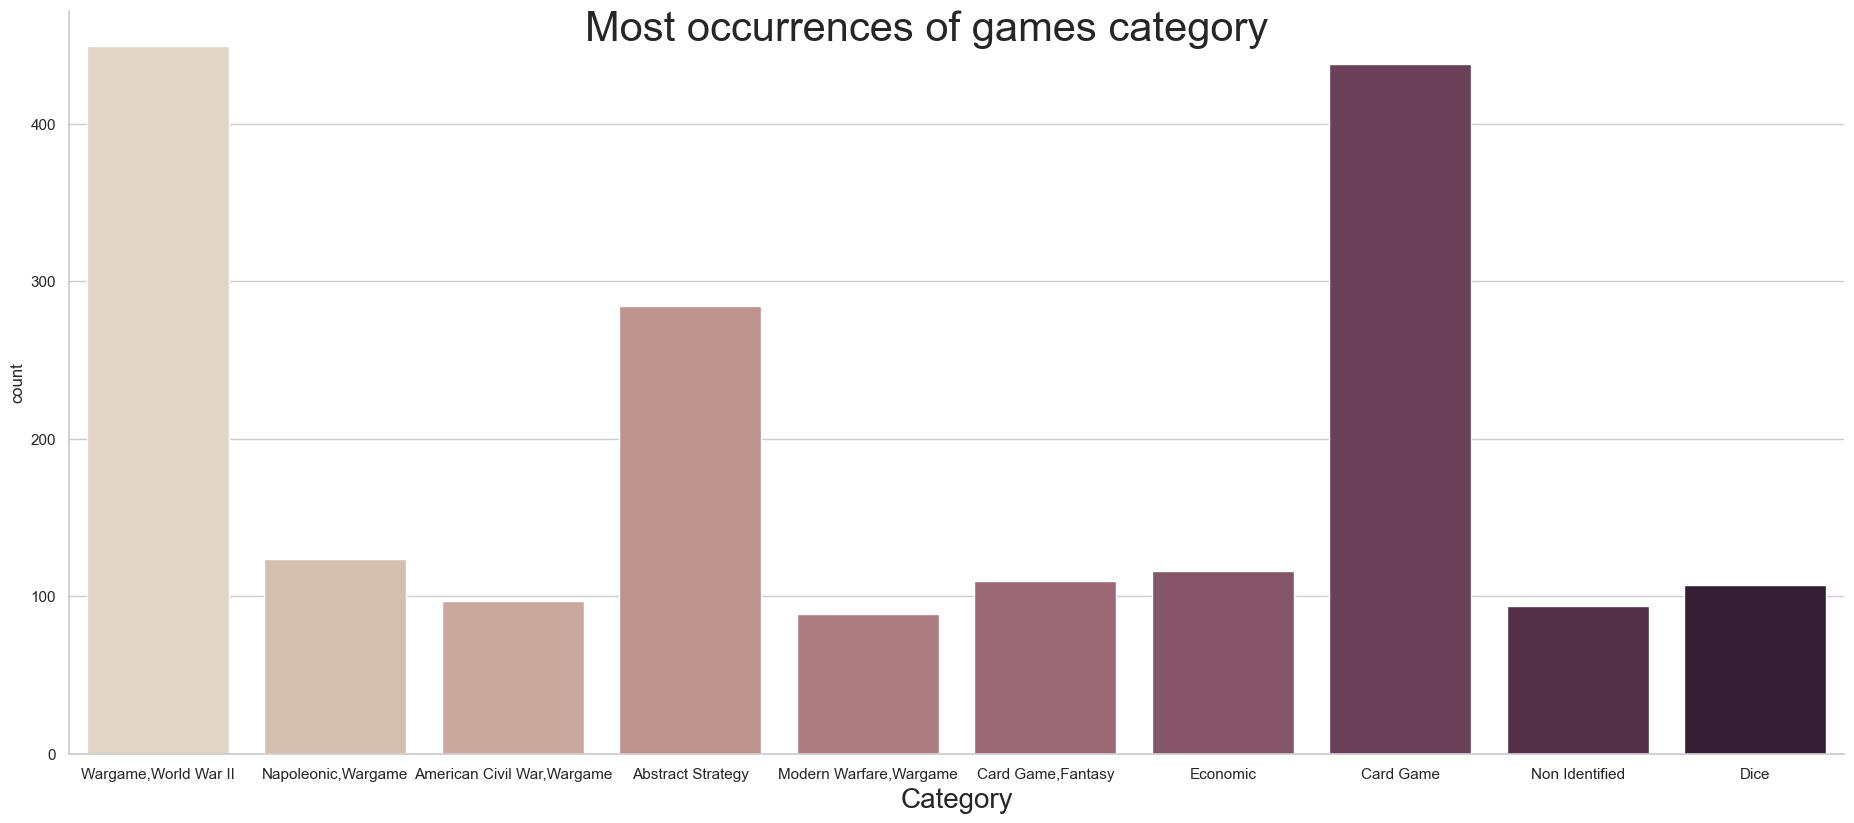

In [82]:
cat = sns.catplot(data=categorytop10, x="category", kind="count", palette="ch:.25",height=8.27, aspect=18.7/8.27);
cat.fig.suptitle('Most occurrences of games category',size=30 );
plt.xlabel("Category",fontsize=20)
plt.xticks(fontsize=11);

*As we can tell, the distribution does not follow a normal standard and the most published categories of games we can find on the dataset are* **Wargame World War, Card Games and Abstract Strategy.**

*************** 


## Older games Analysis
### Do older games (1992 and earlier) have a higher MEAN “average rating” than newer games (after 1992)?

*For this task, the main challenge will be to filter the information and split it up among new variables to be used and afterwards as comparison samples.* 

*On the following lines of codes, I will determine the logical categories that will be applied on new datasets where I will filter Old games (since 1992 and before) and newly published games(after 1992).*


In [83]:
newdf = data["year_published"].loc[lambda x : x <= 1992]
oldgames = data[data['year_published'].isin(newdf)]

*Above, filtering the observations where the published year is iguals to 1992 or lower.*

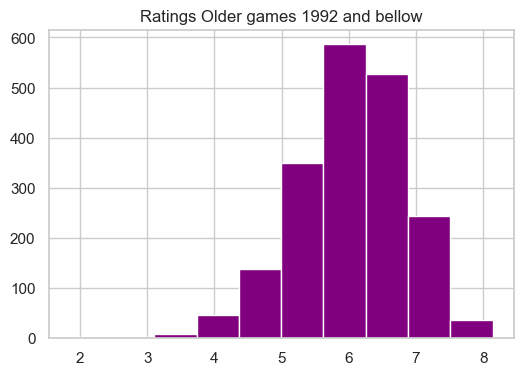

In [84]:
plt.figure(figsize=(6,4))
oldgames['average_rating'].hist(color="purple")
plt.title("Ratings Older games 1992 and bellow");

In [85]:
newdata = data["year_published"].loc[lambda x : x > 1992]
newergames = data[data['year_published'].isin(newdata)]

*Above, filtering the observations where the published year is higher than 1992.*

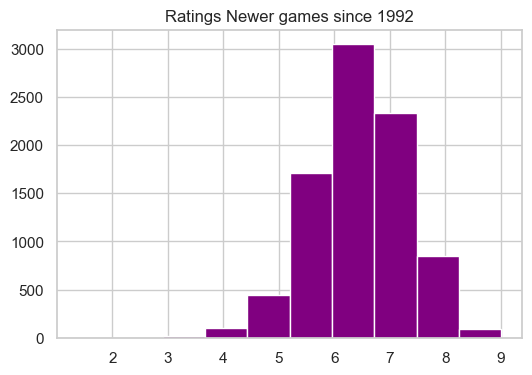

In [86]:
plt.figure(figsize=(6,4))
newergames['average_rating'].hist(color="purple")
plt.title("Ratings Newer games since 1992");

In [87]:
oldg = oldgames["average_rating"].mean();
newg = newergames["average_rating"].mean();

*Getting the avarage ratings from the set of observations defined.*

In [88]:
print("The avarage of rating from the oldest games is","%.2f" %oldg )
print("The avarage of rating from the newest games is","%.2f" %newg)

The avarage of rating from the oldest games is 6.04
The avarage of rating from the newest games is 6.45


*Finally, replying to the question newer games have a slight tendency to have better-rated games than older games since 1992.*

*Whereas in older games the average rating goes at 6.04 and in newer games goes at 6.45*


***********

## 3 most common “mechanics” in the dataset

*For that request, I will use the same code and method I applied to get to the 10 most common games categories while trying to find the distribution of the column "category".* 

*Followed by the code bellow:*

In [89]:
top3 = data['mechanic'].value_counts().index[:3]
categorytop3 = data[data['mechanic'].isin(top3)]
categorytop3

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,thumbnail,year_published,artist,category,designer,family,mechanic,publisher,average_rating,users_rated
6022,39939,From the Clash of Arms May 2008 Works In Progr...,//cf.geekdo-images.com/images/pic1232483.jpg,2,0,0,1,0,"The Battle of Fontenoy: 11 May, 1745",0,//cf.geekdo-images.com/images/pic1232483_t.jpg,2012,"Charles Kibler,Félix Philippoteaux,Timothy Sch...","Age of Reason,Wargame","Paul Dangel,Mathew Hinkle","Age of Kings,Battles from the Age of Reason (BAR)",Hex-and-Counter,Clash of Arms Games,8.62571,70
7011,85424,"This is the new, 3rd edition of the venerable ...",//cf.geekdo-images.com/images/pic965093.jpg,8,1000,16,2,1000,La Bataille de la Moscowa (third edition),1000,//cf.geekdo-images.com/images/pic965093_t.jpg,2011,"Charles Kibler,Timothy Schleif,Robert Tunstall","Napoleonic,Wargame",Terry Doherty,"La Bataille series,Country: Russia",Hex-and-Counter,Clash of Arms Games,8.60210,111
8756,149620,(from MMP website:)&#10;&#10;Decision at Elst ...,//cf.geekdo-images.com/images/pic1819745.jpg,2,0,0,2,0,Advanced Squad Leader: Starter Kit Historical ...,0,//cf.geekdo-images.com/images/pic1819745_t.jpg,2014,Nicolás Eskubi,"Wargame,World War II",Ken Dunn,"Advanced Squad Leader,Advanced Squad Leader St...",Hex-and-Counter,Multi-Man Publishing,8.47818,110
9294,163172,"(in English, from the designer:)&#10;&#10;Wate...",//cf.geekdo-images.com/images/pic2415214.jpg,3,720,14,1,60,Waterloo 1815: Fallen Eagles,720,//cf.geekdo-images.com/images/pic2415214_t.jpg,2015,"Sébastien Brunel,Christophe Gentil-Perret","Napoleonic,Wargame",Walter Vejdovsky,Non Identified,Hex-and-Counter,Hexasim,8.38113,106
10527,214996,Description from the publisher:&#10;&#10;Silve...,//cf.geekdo-images.com/images/pic3093082.png,2,480,12,1,30,"Silver Bayonet: The First Team in Vietnam, 196...",480,//cf.geekdo-images.com/images/pic3093082_t.png,2016,Charles Kibler,"Vietnam War,Wargame","Gene Billingsley,Mitchell Land",GMT Operational System,Hex-and-Counter,GMT Games,8.35333,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2524,5050,Publisher's Description:&#10;&#10;Do you know ...,//cf.geekdo-images.com/images/pic336179.jpg,10,0,8,2,0,The Worst-Case Scenario Survival Game,0,//cf.geekdo-images.com/images/pic336179_t.jpg,2002,Non Identified,Trivia,(Uncredited),The Worst-Case Scenario Survival Family,Non Identified,University Games,3.22707,477
9741,175512,A Chaotic Life is a tiny card game with MASSIV...,//cf.geekdo-images.com/images/pic2464339.png,4,0,10,2,30,A Chaotic Life!,0,//cf.geekdo-images.com/images/pic2464339_t.png,2015,Non Identified,"Card Game,Humor",Non Identified,Crowdfunding: Kickstarter,Non Identified,GrubTon Games,3.20615,122
4965,24783,Players become CTU agents trying to collect cl...,//cf.geekdo-images.com/images/pic174907.jpg,2,0,12,2,0,24 DVD Board Game,0,//cf.geekdo-images.com/images/pic174907_t.jpg,2006,Non Identified,"Movies / TV / Radio theme,Puzzle",(Uncredited),"DVD Board Games,TV Series: 24",Non Identified,Pressman Toy Corp.,2.07772,57
1972,3504,"Super Deck! is a card game, in which players s...",//cf.geekdo-images.com/images/pic182103.jpg,2,20,12,2,20,Super Deck!,20,//cf.geekdo-images.com/images/pic182103_t.jpg,1994,"Howard Bender,Brian Michael Bendis,Bill Black,...","Card Game,Collectible Components,Math,Science ...",Marc W. Miller,"CCGs (Collectible Card Games),Superheroes",Non Identified,Card Sharks,1.96986,70


*For that filtered category, the dataset with the Top 3 most common ended up with 1770 observations. For better visualization of those, a histogram will be displayed.*

<Figure size 400x400 with 0 Axes>

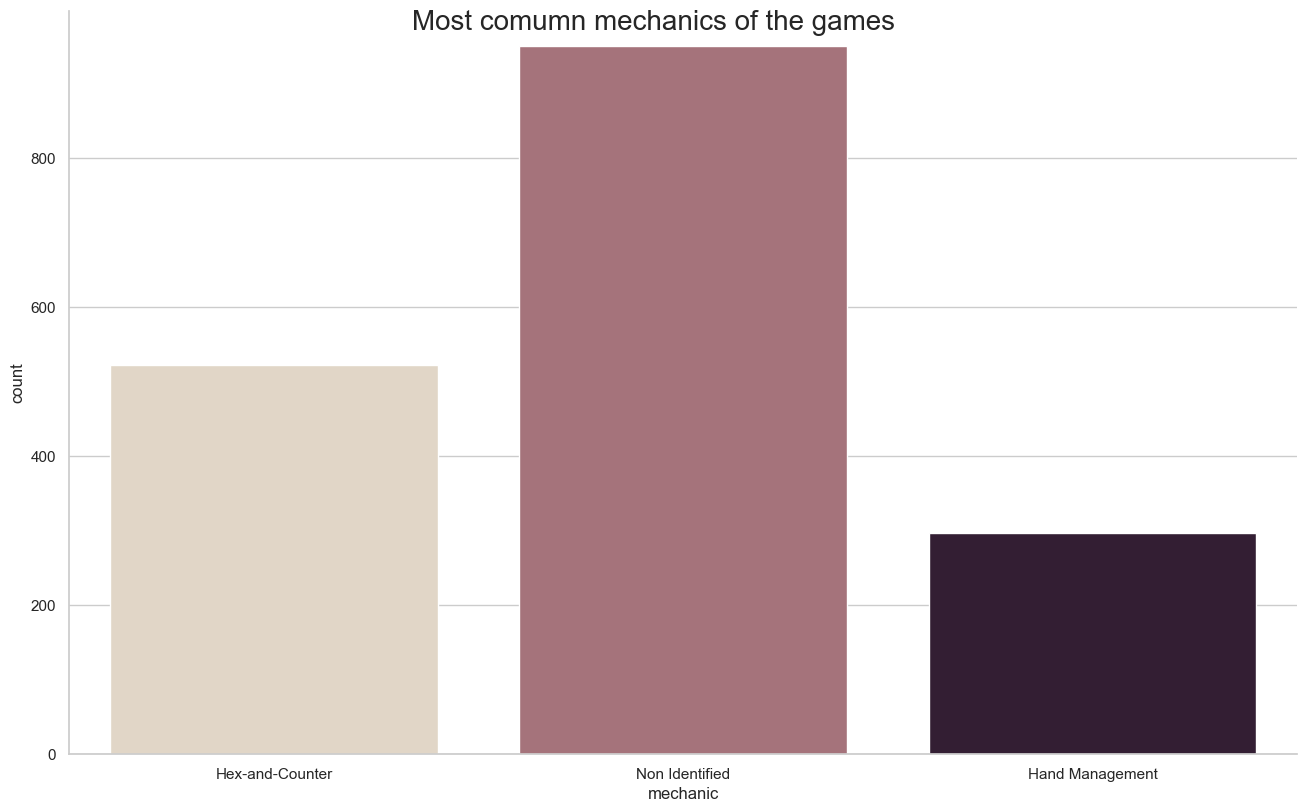

In [96]:
plt.figure(figsize=(4,4));
cat2 = sns.catplot(data=categorytop3, x="mechanic", kind="count", palette="ch:.25",height=8.27, aspect=8/5);
cat2.fig.suptitle('Most comumn mechanics of the games',size=20 );

*The category "non Identified mechanic", is the first one, followed by "Hex-and-Counter" and in the 3rd place "Hand Management".*


# Part 2

## Statistically Relevant question

*In order to develop a statistics analysis I will figure out whether* **the best-rated games are the ones with the longest playing time recorded.?**

In [97]:
playingtime = data.sort_values('playing_time',ascending=False)
playingtime = playingtime.iloc[:5,]
playingtime

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,thumbnail,year_published,artist,category,designer,family,mechanic,publisher,average_rating,users_rated
2449,4815,This is a war game like no other. Although th...,//cf.geekdo-images.com/images/pic339497.jpg,10,60000,14,8,60000,The Campaign for North Africa,60000,//cf.geekdo-images.com/images/pic339497_t.jpg,1979,Redmond A. Simonsen,"Wargame,World War II",Richard H. Berg,Non Identified,Hex-and-Counter,"SPI (Simulations Publications, Inc.)",5.62887,97
6293,46669,"(from GMT website:)&#10;&#10;1914, Offensive &...",//cf.geekdo-images.com/images/pic1878177.jpg,4,17280,0,2,17280,1914: Offensive à outrance,17280,//cf.geekdo-images.com/images/pic1878177_t.jpg,2013,"Rodger B. MacGowan,Michael Resch","Wargame,World War I",Michael Resch,"1914 series,Country: Belgium,Country: France,...",Hex-and-Counter,GMT Games,7.99855,69
206,254,(from the back of the box - Avalon Hill editio...,//cf.geekdo-images.com/images/pic75368.jpg,7,12000,14,2,6000,Empires in Arms,12000,//cf.geekdo-images.com/images/pic75368_t.jpg,1983,"Michael Fisher,Charles Kibler,George I. Parris...","Economic,Napoleonic,Negotiation,Political,Wargame","Greg Pinder,Harry Rowland",Non Identified,"Area Movement,Dice Rolling,Secret Unit Deploym...","Australian Design Group,Avalon Hill",7.53553,1067
3029,6942,Introduction:&#10;&#10;Drang Nach Osten! is an...,//cf.geekdo-images.com/images/pic199223.jpg,4,12000,12,2,12000,Drang Nach Osten!,12000,//cf.geekdo-images.com/images/pic199223_t.jpg,1973,Non Identified,"Wargame,World War II","Rich Banner,Frank Chadwick",Europa Series,"Dice Rolling,Hex-and-Counter,Simulation",GDW Games,6.86429,56
993,1499,(from ADG website :)&#10;&#10;World in Flames ...,//cf.geekdo-images.com/images/pic2260119.jpg,7,6000,12,2,120,World in Flames,6000,//cf.geekdo-images.com/images/pic2260119_t.jpg,1985,"Chris Denton,Michael Fisher,Rodger B. MacGowan","Wargame,World War II","Greg Pinder,Harry Rowland",World in Flames,"Area Movement,Dice Rolling,Hex-and-Counter",Australian Design Group,7.50574,1162


*Above, I have defined the variable with the best played time games on the dataset.* 

In [98]:
Betterrated = data.sort_values('average_rating',ascending=False)
Betterrated = Betterrated.iloc[:5,]
Betterrated

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,thumbnail,year_published,artist,category,designer,family,mechanic,publisher,average_rating,users_rated
8348,140135,Small World's Designer Edition is a spare-no-e...,//cf.geekdo-images.com/images/pic2270432.jpg,6,80,8,2,40,Small World Designer Edition,80,//cf.geekdo-images.com/images/pic2270432_t.jpg,2015,"Miguel Coimbra,Cyrille Daujean","Civilization,Fantasy,Territory Building",Philippe Keyaerts,"Crowdfunding: Kickstarter,Small World","Area Control / Area Influence,Area Movement,Di...",Days of Wonder,9.00392,180
6392,55690,Kingdom Death: Monster is a fully cooperative ...,//cf.geekdo-images.com/images/pic2931007.jpg,6,180,17,1,60,Kingdom Death: Monster,180,//cf.geekdo-images.com/images/pic2931007_t.jpg,2015,"Lokman Lam,Lorinda Tomko","Adventure,Fantasy,Horror,Mature / Adult,Miniat...",Adam Poots,"Campaign Games,Crowdfunding: Kickstarter,Kingd...","Co-operative Play,Dice Rolling,Grid Movement,R...",Kingdom Death,8.93184,1954
9964,181289,"Terra Mystica: Big Box, a Korean crowdfunding ...",//cf.geekdo-images.com/images/pic2602334.jpg,5,150,12,2,60,Terra Mystica: Big Box,150,//cf.geekdo-images.com/images/pic2602334_t.jpg,2015,Dennis Lohausen,"Civilization,Economic,Fantasy,Territory Building","Jens Drögemüller,Helge Ostertag",Terra Mystica,"Route/Network Building,Variable Player Powers","Feuerland Spiele,Korea Boardgames co., Ltd.",8.84862,109
8526,144574,(from MMP website:)&#10;&#10;Last Chance for V...,//cf.geekdo-images.com/images/pic1875530.jpg,2,60,15,2,60,Last Chance for Victory,60,//cf.geekdo-images.com/images/pic1875530_t.jpg,2014,"Dean Essig,Gettysburg Cyclorama","American Civil War,Civil War,Wargame",Dean Essig,Line of Battle Series,"Dice Rolling,Hex-and-Counter",Multi-Man Publishing,8.84603,88
9675,173504,"The Greatest Day: Sword, Juno, and Gold Beache...",//cf.geekdo-images.com/images/pic2422496.jpg,8,6000,12,2,60,"The Greatest Day: Sword, Juno, and Gold Beaches",6000,//cf.geekdo-images.com/images/pic2422496_t.jpg,2015,Nicolás Eskubi,"Wargame,World War II",Adam Starkweather,Grand Tactical Series,Chit-Pull System,Multi-Man Publishing,8.83081,86


*Above, I have defined the variable with the best ratings games on the dataset.*

*For the next step, I will display both observations of the games and compare if the most played games got the best ratings. With that, we can figure out if the players enjoyed playing the game for long hours and rated positively the game*.

In [99]:
Betterrated2 = Betterrated["name"].unique() 
playingtime2 = playingtime["name"].unique() 

*Above I got the name of the games with the best ratings and playing time and below I will display them in order to make a comparison.*

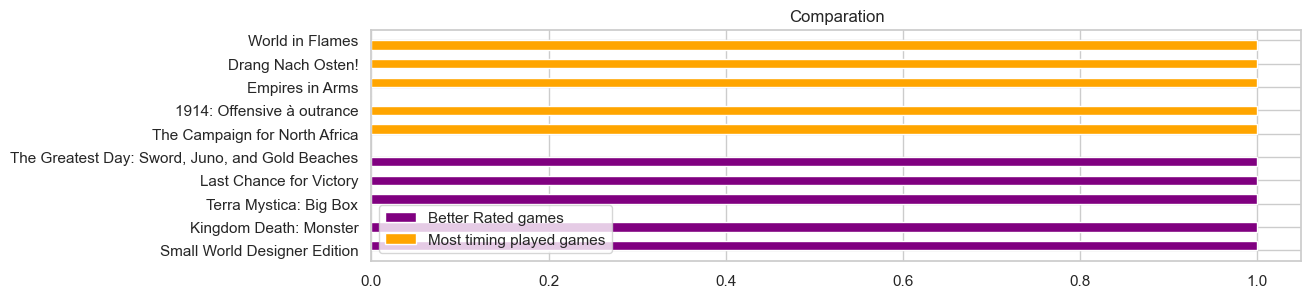

In [100]:
plt.figure(figsize=(12,3))
Betterrated["name"].hist(orientation='horizontal',color="purple",label='Better Rated games');
playingtime["name"].hist(orientation='horizontal',color="orange", label="Most timing played games")
plt.legend()

plt.title("Comparation");

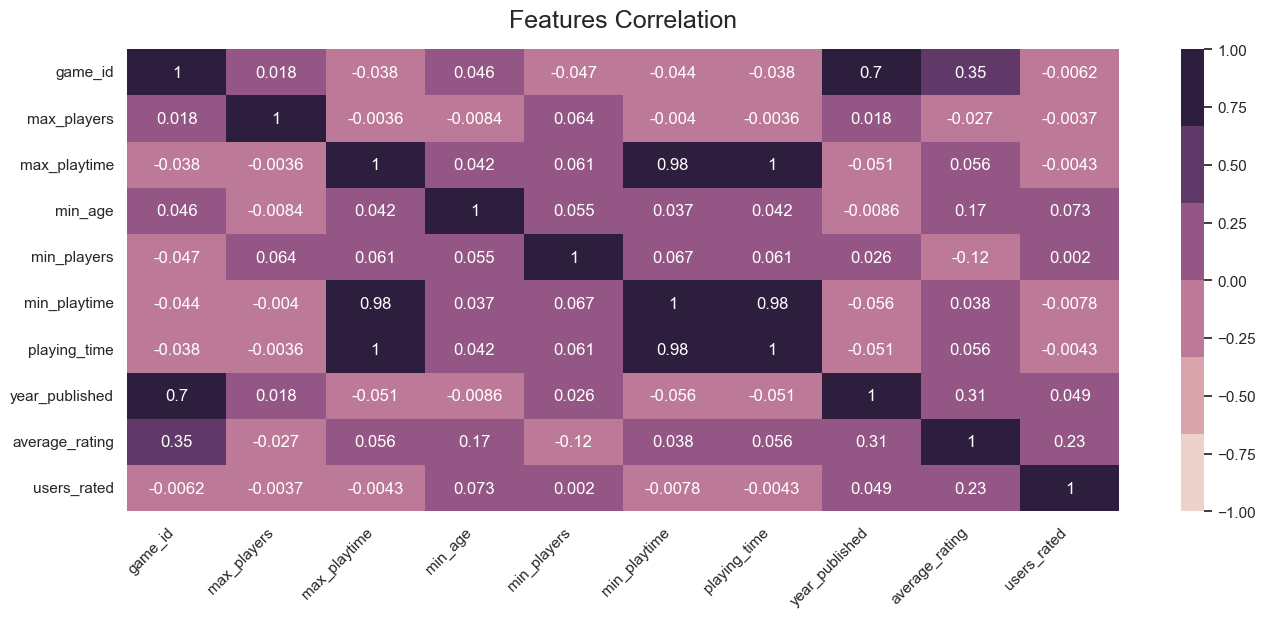

In [101]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,cmap=sns.cubehelix_palette())

## Title
heatmap.set_title('Features Correlation', fontdict={'fontsize':18}, pad=16);

## Lables features
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

*Above I got the name of the games with the best ratings and playing time and below I will display them in order to make a comparison.*

*In the 2 plot graphs above, I have displayed the better-rated and most-played games in order to make the comparison between them. As we can tell, we don't have the same games in both categories. Afterwards, I brought back the correlation matrix I used before to check out if those features have a correlation among them and I noticed they have a reply low correlation of 0.05, which means, replying to the question I made myself for this challenge, the most played games does not mean they are the best rated by the public.* 

# Part 3

## Method applied for visualization purposes

- Why you chose a specific method to engineer the data and how you achieved this in Python (Part 1/Part 2): 

> All the steps taken are described right below all the code processed throughout the project. 

- Why you chose your specific visualizations to illustrate each answer (Part 1/Part 2): 

> At a lot of the tasks requested were in concern with categorical matters. For better visualization, most of the graph was made in Histogram for a better understanding of the distributions. 
- what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2): 

> I picked up by using the same pallet of colours, added title in all the graphs and the size of the plots were defined in order to make easier their reading. Legend were displayed and when necessary imformation were highlighted on the plots.

- What your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2): 

> Once again, I had to handle a categorical issue created by myself. I could only display the list of observations I got from the code I write although for humans reading and visualization colours and shapes make easier comprehension so for more that was not completely necessary to plot a graph, I did for reasonable reasons. 

# Sources

- Simplilearn.com. (n.d.). What Is Correlation? A Guide for Beginners | Simplilearn. [online] Available at: https://www.simplilearn.com/tutorials/statistics-tutorial/what-is-correlation-in-statistics.


- McDonald, A. (2021). Using the missingno Python library to Identify and Visualise Missing Data Prior to Machine Learning. [online] Medium. Available at: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009#:~:text=The%20missingno%20Library [Accessed 22 Apr. 2023].